# Sabermetrics-A statistical approch to baseball

# MONEYBALL

## Trying to find out the increased cost of winning

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
%matplotlib inline
# 2 files used -team.csv and salaries.csv
#teams.csv -to find the winning team since 1985
#salaries.csv -to find the cost of winning

data=pd.read_csv('Teams.csv')
#data is a python dataframe




In [12]:
d1=data[['yearID','teamID','WSWin']]

In [13]:
d=d1[d1['WSWin']=='Y']
# Now d has all the world series winners yearwise
print d[:5]


     yearID teamID WSWin
137    1884    PRO     Y
173    1886    SL4     Y
197    1887    DTN     Y
213    1888    NY1     Y
229    1889    NY1     Y


In [14]:
#Now we need to get the commulative salaries/payrolls of the employees
salary=pd.read_csv('Salaries.csv')
s1=salary[['yearID','teamID','salary']]
print s1[0:5]


   yearID teamID   salary
0    1985    BAL  1472819
1    1985    BAL  1090000
2    1985    BAL   800000
3    1985    BAL   725000
4    1985    BAL   641667


In [26]:
#we need to find the sum of all the salaries to get the cost of the total team for the year
#Initalize payroll (list object)
commulative_sal=[]
for years in xrange(1985,2013):
    dd=d[d['yearID']==years]
    ss=s1[s1['yearID']==years]
    m=pd.merge(dd,ss,on=['yearID','teamID'],how='inner')
    commulative_sal.append(float(sum(m['salary'])/1000000))
print commulative_sal

[9.0, 15.0, 6.0, 16.0, 15.0, 14.0, 23.0, 44.0, 47.0, 0.0, 47.0, 54.0, 48.0, 66.0, 86.0, 92.0, 85.0, 61.0, 49.0, 127.0, 75.0, 88.0, 143.0, 97.0, 201.0, 98.0, 105.0, 117.0]


In [38]:
# next we find the average cost of a team for the year
avg=pd.read_csv('Salaries.csv')
a1 = avg[['yearID','salary']]
average = []


def FindAverage(years):
    a2 = a1[a1['yearID'] == years]
    average.append(float(sum(a2['salary'])/30000000))



for i in range(1985,2013):
    FindAverage(i)

print average


[8.0, 10.0, 9.0, 10.0, 11.0, 14.0, 20.0, 26.0, 30.0, 30.0, 31.0, 31.0, 37.0, 42.0, 49.0, 55.0, 65.0, 67.0, 70.0, 69.0, 72.0, 77.0, 82.0, 89.0, 88.0, 90.0, 92.0, 97.0]


In [42]:
years = []
for i in range(1985,2013):
    years.append(i)

print years

[1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012]


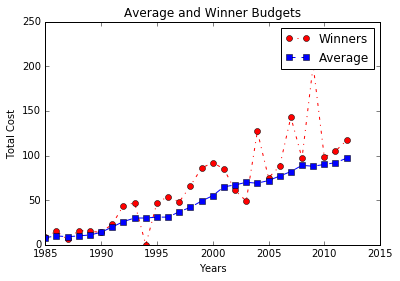

In [54]:
plt.plot(years, commulative_sal, label = 'Winners', marker = 'o', color = 'r',linestyle = '-.')
plt.plot(years, average, label = 'Average', marker = 's', color = 'b', linestyle = '--')
plt.xlabel('Years')
plt.ylabel('Total Cost')
plt.title('Average and Winner Budgets')
plt.legend()
plt.show()